In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy import stats
import natsort
from statsmodels.stats.multitest import multipletests

# pd.set_option('display.max_colwidth', 500)
pd.set_option('display.max_colwidth', 0)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"

In [79]:
# columns = pd.read_csv('/work/projects/archaea_neurodeg/coevolution/hgt_analysis/output_new_aion/genomes_MetaCHIP_wd/genomes_s6_HGTs_only_id_parsed.txt',
#                      sep='\t', header=None, names=['genome1', 'genome2'])

columns = pd.read_csv('/work/projects/archaea_neurodeg/coevolution/hgt_analysis/output_new_aion/genomes_MetaCHIP_wd/genomes_s6_HGTs_only_id_groupped_parsed.txt',
                     sep='\t', header=None, names=['genome1', 'genome2'])

In [80]:

columns

genome1 genome2
0       E       A     
1       E       B     
2       E       B     
3       E       B     
4       E       B     
...    ..      ..     
534589  A       E     
534590  A       B     
534591  A       E     
534592  A       E     
534593  A       B     

[534594 rows x 2 columns]

In [4]:
df = pd.crosstab(columns.genome1, columns.genome2)
idx = df.columns.union(df.index)
df = df.reindex(index = idx, columns=idx, fill_value=0)

In [5]:
df

3300005692_2  3300029120_22  3300029339_36  3300029340_36  \
3300005692_2      0             0              1              0               
3300029120_22     0             0              2              0               
3300029339_36     0             0              0              0               
3300029340_36     0             0              0              0               
3300029378_22     0             0              2              0               
...              ..            ..             ..             ..               
GUT_GENOME285547  2             1              5              2               
GUT_GENOME285960  1             6              1              14              
GUT_GENOME286154  0             1              0              1               
GUT_GENOME286611  0             0              3              0               
GUT_GENOME286660  0             1              0              3               

                  3300029378_22  3300029381_47  3300029385_28  3300029388_24  \
3300005692_2      0              0              0              0               
3300029120_22     0              0              0              0               
3300029339_36     0              0              1              0               
3300029340_36     0              0              0              0               
3300029378_22     0              0              0              0               
...              ..             ..             ..             ..               
GUT_GENOME285547  3              2              46             10              
GUT_GENOME285960  1              14             131            31              
GUT_GENOME286154  3              2              22             3               
GUT_GENOME286611  0              0              1              2               
GUT_GENOME286660  2              2              41             8               

                  3300029394_31  3300029435_39  ...  GUT_GENOME284970  \
3300005692_2      0              0              ...  0                  
3300029120_22     0              0              ...  0                  
3300029339_36     0              0              ...  0                  
3300029340_36     0              0              ...  0                  
3300029378_22     0              0              ...  0                  
...              ..             ..              ... ..                  
GUT_GENOME285547  1              7              ...  0                  
GUT_GENOME285960  2              19             ...  0                  
GUT_GENOME286154  0              4              ...  0                  
GUT_GENOME286611  0              1              ...  0                  
GUT_GENOME286660  0              13             ...  0                  

                  GUT_GENOME285106  GUT_GENOME285252  GUT_GENOME285299  \
3300005692_2      0                 2                 0                  
3300029120_22     0                 2                 0                  
3300029339_36     0                 0                 0                  
3300029340_36     0                 2                 0                  
3300029378_22     0                 1                 0                  
...              ..                ..                ..                  
GUT_GENOME285547  0                 2                 0                  
GUT_GENOME285960  0                 4                 0                  
GUT_GENOME286154  0                 1                 0                  
GUT_GENOME286611  0                 0                 0                  
GUT_GENOME286660  0                 2                 0                  

                  GUT_GENOME285439  GUT_GENOME285547  GUT_GENOME285960  \
3300005692_2      0                 0                 0                  
3300029120_22     0                 0                 0                  
3300029339_36     0                 0                 0                  
3300029340_36     0                 0         

In [6]:
df[df.columns=='3300005692_2']

3300005692_2  3300029120_22  3300029339_36  3300029340_36  \
3300005692_2  0             0              1              0               

              3300029378_22  3300029381_47  3300029385_28  3300029388_24  \
3300005692_2  0              0              0              0               

              3300029394_31  3300029435_39  ...  GUT_GENOME284970  \
3300005692_2  0              0              ...  0                  

              GUT_GENOME285106  GUT_GENOME285252  GUT_GENOME285299  \
3300005692_2  0                 2                 0                  

              GUT_GENOME285439  GUT_GENOME285547  GUT_GENOME285960  \
3300005692_2  0                 0                 0                  

              GUT_GENOME286154  GUT_GENOME286611  GUT_GENOME286660  
3300005692_2  0                 0                 0                 

[1 rows x 1011 columns]

In [81]:
def get_adjacency_matrix(df, col1, col2):
    df = pd.crosstab(df[col1], df[col2])
    idx = df.columns.union(df.index)
    df = df.reindex(index = idx, columns=idx, fill_value=0)
    return df

a_to_b = get_adjacency_matrix(columns, "genome1", "genome2")
b_to_a = get_adjacency_matrix(columns, "genome2", "genome1")

symmetric_adjacency_matrix = a_to_b + b_to_a

In [82]:
symmetric_adjacency_matrix

A       B    C       E      F
A  0       100369  222  337472  14763
B  100369  0       19   4963    76391
C  222     19      0    6       0    
E  337472  4963    6    0       389  
F  14763   76391   0    389     0

In [9]:
symmetric_adjacency_matrix[symmetric_adjacency_matrix.columns == '3300029385_28']

3300005692_2  3300029120_22  3300029339_36  3300029340_36  \
3300029385_28  0             0              3              0               

               3300029378_22  3300029381_47  3300029385_28  3300029388_24  \
3300029385_28  0              0              0              0               

               3300029394_31  3300029435_39  ...  GUT_GENOME284970  \
3300029385_28  0              0              ...  52                 

               GUT_GENOME285106  GUT_GENOME285252  GUT_GENOME285299  \
3300029385_28  49                8                 137                

               GUT_GENOME285439  GUT_GENOME285547  GUT_GENOME285960  \
3300029385_28  48                46                131                

               GUT_GENOME286154  GUT_GENOME286611  GUT_GENOME286660  
3300029385_28  22                1                 41                

[1 rows x 1011 columns]

In [10]:
symmetric_adjacency_matrix[symmetric_adjacency_matrix.columns == 'GUT_GENOME285299']

3300005692_2  3300029120_22  3300029339_36  3300029340_36  \
GUT_GENOME285299  2             2              0              12              

                  3300029378_22  3300029381_47  3300029385_28  3300029388_24  \
GUT_GENOME285299  13             16             137            13              

                  3300029394_31  3300029435_39  ...  GUT_GENOME284970  \
GUT_GENOME285299  1              36             ...  0                  

                  GUT_GENOME285106  GUT_GENOME285252  GUT_GENOME285299  \
GUT_GENOME285299  0                 2                 0                  

                  GUT_GENOME285439  GUT_GENOME285547  GUT_GENOME285960  \
GUT_GENOME285299  0                 0                 0                  

                  GUT_GENOME286154  GUT_GENOME286611  GUT_GENOME286660  
GUT_GENOME285299  0                 0                 0                 

[1 rows x 1011 columns]

In [83]:
symmetric_adjacency_matrix.to_csv('/work/projects/archaea_neurodeg/coevolution/hgt_analysis/adjacency_matrix_4_circos_by_groups.tsv',
                                 header=True, sep='\t')

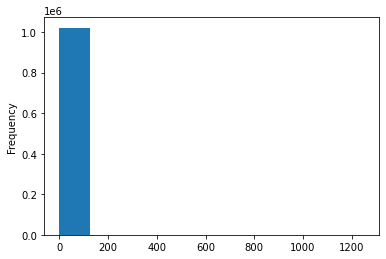

In [12]:
# symmetric_adjacency_matrix.stack().plot.hist(xlim=(0,150))

fig, ax = plt.subplots(figsize = (6,4))
symmetric_adjacency_matrix.stack().plot(kind = "hist")
plt.show()

(0.0, 1019030.0)

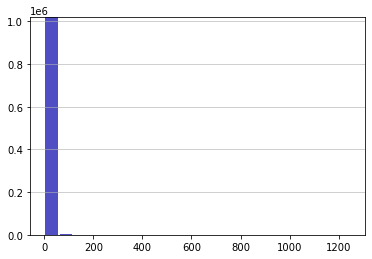

In [19]:
import matplotlib.pyplot as plt

# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=symmetric_adjacency_matrix.stack(), bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
maxfreq = n.max()



AttributeError: 'AxesSubplot' object has no attribute 'facet_data'

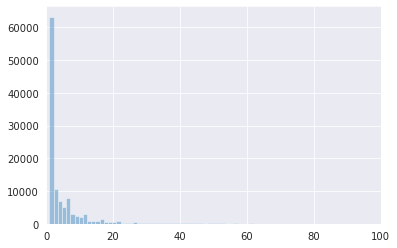

In [61]:
import seaborn as sns

sns.set_style('darkgrid')
g = sns.distplot(symmetric_adjacency_matrix[symmetric_adjacency_matrix != 0].values, kde=False, bins=1000)
g.set(xlim=(0, 100))



In [68]:
symmetric_adjacency_matrix[symmetric_adjacency_matrix != 0].stack().median()

2.0

In [69]:
symmetric_adjacency_matrix[symmetric_adjacency_matrix != 0].stack().mean()

8.959175465057818

In [76]:
matrix_reduced = symmetric_adjacency_matrix[symmetric_adjacency_matrix>=10].fillna(0)

In [78]:
matrix_reduced.to_csv('/work/projects/archaea_neurodeg/coevolution/hgt_analysis/adjacency_matrix_4_circos_reduced.tsv',
                                 header=True, sep='\t')